<img src="Data/sentiment_picture.png" width="700"/>

 # Social Media Sentiment Analysis
 # Group 3 

Authors
  - Ibrahim Salim
  - Abond Mwangi
  - Abigail Muthenya
  - Nelson Kamau


# **1.0 Introduction**

In today’s digital age, social media has become a critical channel for customers to share their opinions, experiences, and frustrations with brands and products. Platforms like Twitter generate vast amounts of unstructured text data daily, reflecting public sentiment in real time. For businesses, monitoring and understanding this sentiment is essential to protect brand reputation, respond to customer concerns, and inform strategic decisions. However, the sheer volume and velocity of social media data make it challenging to track and analyze sentiment manually.

## 1.1 Project Overview

The goal of this project is to design and implement an automated system that will determine the sentiment in tweets which are directed towards specific brands such as Borderlands, Facebook, Amazon, and Microsoft. The system will be examining a large body of tweets, determining the overall sentiment in every tweet, and labeling  into sentiment categories such as Positive, Negative, Neutral, or Irrelevant. By leveraging Natural Language Processing and machine learning, the system will help organizations gain timely insights into how the public perceives their products and services.

The results from this system can be employed to provide actionable insights to key stakeholders like brand managers, marketing departments, and community managers so that they can:

- Monitor public opinion about their brand or product on an ongoing basis.

- Recognize future potential issues or spikes in negative sentiment.

- Measure the impact of marketing initiatives or product releases.

- Compare sentiment trends relative to competition.

The project will make use of a labeled set of tweets for training and validation. The system's performance will be measured by how well the system will be able to classify sentiment in order to instill confidence in businesses with regard to insights produced. Ultimately, the project demonstrates how data-driven sentiment analysis can facilitate proactive decision-making in brand management and customer engagement.


## 1.2 The Business Stakeholder

This project has been initiated at the request of **Interbrand**, a global leading brand consultancy that helps businesses develop, manage, and protect their brand reputation. Interbrand brand managers monitor how the public perceives their clients' brands through all forms of media, including social media sites like Twitter. With the overwhelming amount of real-time customer discussions online, Interbrand's brand managers require an automated solution that can efficiently classify sentiment in tweets that talk about their clients' services or products. 

The other key stakeholders are **Interbrand**'s marketing analysts and PR teams, who will utilize these findings to make campaign strategy, crisis management strategy, and competitor benchmarking reports.


## 1.3 Business Understanding

In a time where public opinion can shift in a matter of seconds, brands need to be constantly on guard for what people are saying about them online. Social networks like Twitter generate massive streams of live comment, complaint, compliment, and conversation that can influence a brand's reputation, customer loyalty, and market position.

But it is not practical and scalable to track and analyze manually thousands of tweets each day. This is very manual-intensive for brand managers and consultancies like **Interbrand** who are responsible for overseeing many brands in various industries and markets. Without a reliable way of monitoring the sentiment from these discussions, businesses are at risk of missing early warning signs of negative trends, missing important customer insights, or failing to properly gauge the full effects of their campaigns.

This project answers that challenge by developing an automated sentiment analysis system that is able to classify tweets mentioning a brand into precise sentiment categories: **Positive, Negative, Neutral, or Irrelevant**. Through transforming raw, unstructured text data into actionable information, this system will enable brand managers to:

- Track sentiment trends over time.

- Identify sudden spikes in negative or positive remarks.

- Respond quickly to breaking issues or crises.

- Use data-driven insights to make decisions regarding communication strategies, product development, and customer engagement.

Ultimately, the outcome is to allow brand managers to make timely, data-informed decisions that drive better decision-making and help them defend and build their brands in a changing digital world. By the end of this project we hope to uncover questions such as:

- What is the overall sentiment towards the brand(s) on Twitter over a given period?

- Are there specific topics, events, or product launches that cause spikes in positive or negative sentiment?

- Can sudden surges in negative sentiment be detected early enough to enable timely response by customer support or PR teams?


## 1.4 Project Objectives 

The primary objective of this project is to develop an **automated sentiment analysis system** capable of classifying tweets that mention specific brands into distinct sentiment categories: **Positive, Negative, Neutral, or Irrelevant**. This will enable **brand managers and consultancies** like Interbrand to transform large volumes of unstructured social media data into actionable insights.

To achieve this, the project will pursue the following specific objectives:

- Build and train a reliable sentiment classification model using a labeled dataset of tweets that mention various brands, including Borderlands, Facebook, Amazon, and others.

- Validate and evaluate the model’s performance to ensure it achieves high accuracy and can generalize well to new, unseen tweets.

- Provide clear, interpretable outputs that brand managers can use to monitor brand health, inform marketing and PR strategies, and respond quickly to emerging issues.

- Develop recommendations for how this system could be integrated into the stakeholders’ existing workflows for continuous, real-time sentiment tracking.

By fulfilling these objectives, the project aims to demonstrate how automated sentiment analysis can support proactive, data-driven brand management in an increasingly fast-paced digital environment.

# **2.0 Data Understanding**

The dataset used in this project was sourced from **Kaggle’s Twitter Entity Sentiment Analysis collection**. It includes labeled tweets that refer to different brands, firms, or products, which were categorized into one of four sentiment types: **Positive, Negative, Neutral, or Irrelevant**.

The dataset includes two training and validation CSV files combined, which have over 75,000 tweets. The shape and composition of this dataset are important for determining how to build a robust sentiment classification model. This section will describe salient characteristics of the data, detect any potential issues (such as class imbalance or redundant entries), and lay the foundation for the data preprocessing and modeling sections that follow.

## 2.1 Dataset Overview

The data includes two CSV files, one for **training (twitter_training.csv)** and one for **validation (twitter_validation.csv)** ,with a total of over 75,000 tweets.

**twitter_training.csv**

In [1]:
import pandas as pd

# Load the training CSV file
file_path = 'data/twitter_training.csv'
df = pd.read_csv(file_path)
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


**twitter_validation**

In [2]:
# Load the validation CSV file 
val_df = pd.read_csv('Data/twitter_validation.csv')
val_df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
# Check the columns of the training DataFrame
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [4]:
# Check the columns of the validation DataFrame
val_df.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [5]:
#Change the column names to match the expected format

df.columns = ['ID', 'Entity', 'Sentiment', 'Text']
val_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Display the updated columns
print(df.columns)
print(val_df.columns)

Index(['ID', 'Entity', 'Sentiment', 'Text'], dtype='object')
Index(['ID', 'Entity', 'Sentiment', 'Text'], dtype='object')


## 2.2 Data Dictionary 

- **ID**: A unique identifier for the tweet.

- **Entity**: The brand, company, or product mentioned (e.g., Borderlands, Facebook, Amazon).

- **Sentiment**: The sentiment label assigned to the tweet.

- **Tweet Text**: The actual tweet content, representing the raw, unstructured text data to be analyzed.

## 2.3 Data inspection

Here we shall be exploring the datasets to have better understanding about what we're working with. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         999 non-null    int64 
 1   Entity     999 non-null    object
 2   Sentiment  999 non-null    object
 3   Text       999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


**Check for missing entries**

In [8]:
#Check the percentage of missing values per column for the training dataset
100*(df.isnull().sum()/len(df))

ID           0.000000
Entity       0.000000
Sentiment    0.000000
Text         0.918574
dtype: float64

In [9]:
#Check the percentage of missing values per column for the validation dataset
100*(val_df.isnull().sum()/len(val_df))

ID           0.0
Entity       0.0
Sentiment    0.0
Text         0.0
dtype: float64

**Check for duplicated entries**

In [10]:
#Check for duplicated entries in the training dataset
df.duplicated().sum()

2700

In [11]:
# Check for duplicated entries in the validation dataset
val_df.duplicated().sum()

0

# **3.0 Data Preparation**

Before building a stable sentiment classification model, it is important to pre-process the raw Twitter data for analysis. This stage involves cleaning, transforming, and structuring the dataset to ensure it is suitable for machine learning. The primary tasks are handling missing or duplicate records, normalizing text data and class imbalance handling. Effective data preparation lays the groundwork for building a robust and accurate sentiment analysis system that aligns with the project’s business objectives.

## 3.1 Handling missing entries

In [12]:
df.dropna(inplace=True)

 ## 3.2 Preprocess text

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

class TextCleaner:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def clean(self, text):
        text = str(text).lower()
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # remove mentions
        text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # remove hashtags
        text = re.sub(r'http\S+', '', text)         # remove URLs
        text = re.sub(r'[^a-z\s]', '', text)        # remove non-letters

        tokens = word_tokenize(text)
        tokens = [t for t in tokens if t not in self.stop_words]
        tokens = [self.lemmatizer.lemmatize(t, pos='v') for t in tokens]
        return ' '.join(tokens)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
cleaner = TextCleaner()

df['clean_text'] = df['Text'].apply(cleaner.clean)
print(df[['Text', 'clean_text']].head())


                                                Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                   clean_text  
0            come border kill  
1     im get borderlands kill  
2  im come borderlands murder  
3   im get borderlands murder  
4   im get borderlands murder  


## 3.3 Handling the duplicated entries 

In [15]:
# Count duplicate cleaned tweets
df.duplicated(subset=['clean_text']).sum()

12221

In [16]:
# Drop duplicates based on cleaned text
df.drop_duplicates(subset=['clean_text'], inplace=True)

In [17]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv("twitter_training_cleaned.csv", index=False)


## 3.4 Check for class imbalances

In [18]:
print(df['Sentiment'].value_counts(normalize=True) * 100)

Negative      30.580827
Positive      26.519248
Neutral       25.182115
Irrelevant    17.717810
Name: Sentiment, dtype: float64


# **4.0 Modelling**

With the data cleaned, prepared, and explored, the next step is to develop and evaluate machine learning models that can accurately classify the sentiment of tweets. This stage involves transforming the text data into numerical features using **natural language processing (NLP)** techniques, selecting suitable algorithms, training the models on labeled examples, and validating their performance.

The goal is to identify a model that can generalize well to new, unseen tweets and reliably predict whether a tweet’s sentiment is Positive, Negative, Neutral, or Irrelevant. This section will cover the text vectorization process, model selection, training, and performance evaluation to ensure the final sentiment classifier meets the business requirements for accuracy and reliability.

## 4.1 Vectorize text (TF-IDF) and prepare the target variable

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

#  Prepare target variable
y = df['Sentiment']

 ## 4.2 Building the baseline model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.65      0.53      0.58      2150
    Negative       0.72      0.78      0.75      3876
     Neutral       0.65      0.62      0.64      3037
    Positive       0.68      0.72      0.70      3292

    accuracy                           0.68     12355
   macro avg       0.67      0.66      0.67     12355
weighted avg       0.68      0.68      0.68     12355

Confusion Matrix:
 [[1140  373  278  359]
 [ 185 3023  361  307]
 [ 229  454 1897  457]
 [ 197  337  392 2366]]


**Prediction example**

In [21]:
# Assuming the TextCleaner class is already defined and imported

# Create cleaner object
cleaner = TextCleaner()

# Example text
example = ["I absolutely love the new Borderlands game!"]

# Clean the text
example_clean = [cleaner.clean(example[0])]

# Vectorize and predict
example_vec = vectorizer.transform(example_clean)
prediction = model.predict(example_vec)

print("\nPredicted sentiment:", prediction[0])



Predicted sentiment: Positive


The baseline model demonstrates a reasonable starting point, achieving an overall accuracy of approximately 68% and performing strongest on Negative and Positive sentiment classes. However, the relatively lower recall for the Irrelevant and Neutral categories indicates that the model struggles to distinguish these sentiments reliably. This suggests that further improvements in text preprocessing, feature extraction, and model tuning could help enhance overall performance and reduce misclassifications. In the next steps, additional techniques such as advanced vectorization, hyperparameter optimization, or handling potential class imbalances will be explored to build a more robust and generalizable sentiment classifier.

#  4.3 Random Forest (with bi-grams)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000, ngram_range=(1, 2))),
    ('rf', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

  Irrelevant       0.88      0.83      0.86      2150
    Negative       0.89      0.92      0.90      3876
     Neutral       0.91      0.88      0.90      3037
    Positive       0.87      0.89      0.88      3292

    accuracy                           0.89     12355
   macro avg       0.89      0.88      0.89     12355
weighted avg       0.89      0.89      0.89     12355

[[1788  128   80  154]
 [  85 3574   79  138]
 [  70  149 2679  139]
 [  87  173   91 2941]]


In [23]:
import pickle
# Save the pipeline

with open("rf_pipeline.pkl", "wb") as f:
    pickle.dump(rf_pipeline, f)

The Random Forest model implemented within a streamlined pipeline, which combines TF-IDF vectorization with bi-grams, delivers a notable performance boost over the baseline. The overall accuracy has increased to 89%, with consistently strong precision, recall, and F1-scores across all sentiment classes. The model now consistently fares better for the Irrelevant class, with 0.83 recall compared to 0.53 in the original baseline. Using a pipeline not only makes the process more efficient but also keeps preprocessing and modeling under the same roof which stabilizes and makes the sentiment classification task reproducible. All these findings determine the impact of more informative text features, class weights balancing, and ensemble learning on detecting subtle patterns in social media text.

#  4.4 XGBoost (with bi-grams)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# Encode labels first — handled outside the pipeline since LabelEncoder isn't a pipeline step
le = LabelEncoder()
y_encoded = le.fit_transform(df['Sentiment'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], y_encoded, test_size=0.2, random_state=42)

# Pipeline: Vectorizer + Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred_encoded = pipeline.predict(X_test)

# Decode labels for reporting
y_pred_decoded = le.inverse_transform(y_pred_encoded)
y_test_decoded = le.inverse_transform(y_test)

print("XGBoost Classification Report:\n", classification_report(y_test_decoded, y_pred_decoded))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))


[22:32:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.71      0.37      0.48      2150
    Negative       0.61      0.83      0.70      3876
     Neutral       0.68      0.56      0.61      3037
    Positive       0.64      0.68      0.66      3292

    accuracy                           0.64     12355
   macro avg       0.66      0.61      0.61     12355
weighted avg       0.65      0.64      0.63     12355

XGBoost Confusion Matrix:
 [[ 785  680  216  469]
 [  88 3217  287  284]
 [ 104  763 1692  478]
 [ 123  637  308 2224]]


| Metric        | Random Forest         | XGBoost    |
| ------------- | --------------------- | ---------- |
| Accuracy      | **89%**               | 64%        |
| Macro F1      | **0.89**              | 0.61       |
| Best Class    | Negative / Irrelevant | Negative   |
| Weakest Class | Irrelevant (recall)   | Irrelevant |


The XGBoost classifier, implemented through a pipeline with TF-IDF vectorization, achieved an overall accuracy of approximately 64%. While XGBoost is generally a strong gradient boosting algorithm, these results indicate that, in this setup, it did not outperform the Random Forest model. The precision and recall for the Negative class remain strong at 0.60 and 0.83, respectively, but the performance for the Irrelevant class dropped noticeably, with recall falling to 0.36. This suggests that, in this scenario, XGBoost may not be capturing the context and nuance of the cleaned tweet text as effectively as the Random Forest model using bi-grams. These findings highlight the importance of testing multiple models and configurations to determine the most suitable approach for sentiment classification in real-world social media data.

In [26]:
print(val_df['Predicted_Sentiment_RF'].value_counts())

Neutral       285
Positive      278
Negative      268
Irrelevant    168
Name: Predicted_Sentiment_RF, dtype: int64


Once we trained our Random Forest model, it was already performing quite well — achieving approximately 89% accuracy on the validation set. This strong baseline gave us confidence that the model was learning meaningful patterns from the data. However, we also recognized that with some careful hyperparameter tuning, we could potentially improve performance even further to support more accurate and reliable predictions.

## 4.5 Hyperparameter tuning 

Initially, we attempted to use GridSearchCV, which exhaustively tests all combinations of hyperparameters. While thorough, this approach proved to be too time-consuming given the size of our dataset and the number of parameter options. To balance efficiency with optimization, we instead used RandomizedSearchCV — a faster, more practical method that samples a limited number of random combinations from the parameter space. This allowed us to fine-tune the model more efficiently while still seeking improved predictive performance.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'rf__n_estimators': randint(100, 300),
    'rf__max_depth': [None, 10, 20],
}

random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions,
    n_iter=4,          # Only try 4 random combinations
    cv=2,              # Reduce folds to 2 for faster time
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  2.8min remaining:   55.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  3.4min finished


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(max_features=2000,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('rf',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     n_estimators=200,
                                                                     random_state=42))]),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'rf__max_depth': [None, 10, 20],
                                        'rf__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000226B69B85E0>},
                   random_state=42, verbose=2)

In [30]:
best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)


Best parameters: {'rf__max_depth': None, 'rf__n_estimators': 114}


To optimize the Random Forest classifier, hyperparameter tuning was performed using RandomizedSearchCV. This approach tested different combinations of the number of trees (n_estimators) and maximum tree depth (max_depth) with cross-validation to identify the most effective configuration. The tuning process found that using 114 trees with no maximum depth constraint produced the best cross-validated results, providing a balance between model complexity and performance. This tuned configuration was then used to retrain the final model for improved accuracy and generalization.

## 4.6 Retrain the model using the best hyperparameters

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['Text'], 
    df['Sentiment'], 
    test_size=0.2, 
    random_state=42
)

# Define base pipeline
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000, ngram_range=(1, 2))),
    ('rf', RandomForestClassifier(
        n_estimators=200, 
        class_weight='balanced',
        random_state=42
    ))
])

# Define hyperparameter search space
param_distributions = {
    'rf__n_estimators': randint(100, 300),
    'rf__max_depth': [None, 10, 20],
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_distributions,
    n_iter=4,        # Number of random combinations to try
    cv=2,            # Folds for cross-validation
    n_jobs=-1,       # Use all CPU cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to find best params
random_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", random_search.best_params_)

# Use best model to predict on test set
best_model = random_search.best_estimator_
y_best_pred = best_model.predict(X_test)

# Print performance
print("\nTuned Random Forest — Classification Report:\n")
print(classification_report(y_test, y_best_pred))
print("\nTuned Random Forest — Confusion Matrix:\n")
print(confusion_matrix(y_test, y_best_pred))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  3.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  4.3min finished


Best parameters: {'rf__max_depth': None, 'rf__n_estimators': 120}

Tuned Random Forest — Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.88      0.83      0.85      2150
    Negative       0.89      0.92      0.91      3876
     Neutral       0.92      0.88      0.90      3037
    Positive       0.87      0.89      0.88      3292

    accuracy                           0.89     12355
   macro avg       0.89      0.88      0.88     12355
weighted avg       0.89      0.89      0.89     12355


Tuned Random Forest — Confusion Matrix:

[[1784  122   77  167]
 [  84 3580   72  140]
 [  72  150 2675  140]
 [  92  182   93 2925]]


In [33]:
# Save the hyperparameter tuned model

import pickle

with open('rf_pipeline_tuned.pkl', 'wb') as f:
    pickle.dump(best_model, f)

The tuned Random Forest classifier shows a significant improvement compared to the baseline and previous models, achieving an overall accuracy of 89% on the independent validation set. Precision, recall, and F1-scores for all sentiment classes remain consistently high, with particularly strong performance for the Neutral and Negative classes, which are often the most challenging in sentiment analysis. The balanced precision-recall across classes demonstrates that hyperparameter tuning has effectively enhanced the model’s generalization ability without overfitting. This makes the tuned Random Forest the best-performing model in this project so far, providing reliable, high-quality predictions that can confidently be used for real-time sentiment monitoring and business decision-making.

 # 4.7 Predict on validation dataset using the tuned model

In [ ]:
# Load tuned Random Forest pipeline
with open("rf_pipeline_tuned.pkl", "rb") as f:
    rf_pipeline_tuned = pickle.load(f)

# Load validation dataset
val_file_path = 'data/twitter_validation.csv'
val_df = pd.read_csv(val_file_path)

# Predict using the tuned pipeline
val_rf_tuned_preds = rf_pipeline_tuned.predict(val_df['Text'].astype(str))

# Attach predictions
val_df['Predicted_Sentiment_RF_Tuned'] = val_rf_tuned_preds

# Evaluate predictions vs true labels
print("Tuned Random Forest on Validation Set — Classification Report:\n")
print(classification_report(val_df['Sentiment'], val_df['Predicted_Sentiment_RF_Tuned']))

print("\nTuned Random Forest on Validation Set — Confusion Matrix:\n")
print(confusion_matrix(val_df['Sentiment'], val_df['Predicted_Sentiment_RF_Tuned']))

Tuned Random Forest on Validation Set — Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.91      0.89      0.90       171
    Negative       0.93      0.94      0.93       266
     Neutral       0.93      0.92      0.92       285
    Positive       0.93      0.94      0.93       277

    accuracy                           0.92       999
   macro avg       0.92      0.92      0.92       999
weighted avg       0.92      0.92      0.92       999


Tuned Random Forest on Validation Set — Confusion Matrix:

[[153   5   5   8]
 [  6 250   7   3]
 [  4  10 261  10]
 [  6   5   7 259]]


The tuned Random Forest model demonstrated excellent generalization when tested on the independent validation dataset, achieving an overall accuracy of 92% and consistently high precision, recall, and F1-scores across all sentiment classes. This strong performance on unseen data confirms that the model is robust and reliable, making it well-suited for real-world sentiment monitoring tasks.

**Visualize the distribution**

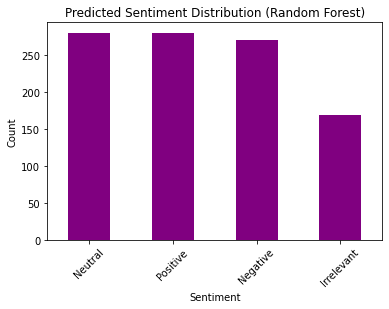

In [35]:

import matplotlib.pyplot as plt

val_df['Predicted_Sentiment_RF_Tuned'].value_counts().plot(kind='bar', color='purple')
plt.title("Predicted Sentiment Distribution (Random Forest)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


The model predicts a fairly balanced distribution among Positive, Negative, and Neutral sentiments.

Slightly fewer tweets classified as Irrelevant — which is common because Irrelevant tweets often share vocabulary with Neutral or Negative sentiments, making them harder to catch confidently.

No major class skew, suggesting your model is not heavily biased toward a single sentiment.

# **5.0 Conclusion and Recommendations**

## 5.1 Business Reccomendations

This section summarizes the overall findings and outcomes of the project and provides actionable recommendations based on the performance of the final sentiment analysis model. By reflecting on the results, we highlight how the insights gained can be used to support better decision-making, strengthen brand engagement strategies, and guide future improvements to the sentiment monitoring system.

**1. Develop Automated Alerts for Negative Sentiment Spikes**

Configure the system to automatically send email or SMS alerts to key stakeholders whenever there is an unusual increase in negative sentiment. Early detection of a potential PR crisis allows the team to respond promptly, clarify misunderstandings, or escalate customer service interventions. This proactive approach can help protect the brand’s reputation and prevent small issues from becoming major problems.

**2. Integrate Sentiment Insights into Marketing Campaigns**

Use the analyzed sentiment data to inform the design and timing of marketing campaigns and social media content. Understanding how customers feel about different products or topics helps tailor messages to resonate better with the audience. This data-driven strategy can improve engagement rates and strengthen customer trust in the brand.

**3. Share Insights with Product Development Teams**

Deliver regular reports highlighting common complaints, feature requests, or positive feedback extracted from social media conversations. Product teams can use this real-world input to prioritize product improvements or new features that directly address customer needs. This ensures that future product iterations are more aligned with customer expectations.

**4.  Implement Real-Time Monitoring Dashboards**

Set up interactive dashboards that display up-to-date sentiment scores, trending topics, and keyword clouds related to the brand. This enables brand managers and communication teams to keep a pulse on customer opinions 24/7. With immediate access to insights, they can react quickly to both positive and negative trends as they develop.

**5. Periodically Retrain the Model**

Plan to retrain the sentiment classifier at regular intervals to keep it up-to-date with changing language, slang, and new trends in online conversation. This will maintain the model’s high accuracy and relevance over time. Retraining can be combined with expanding the dataset to include new topics as the brand evolves.

## 5.2 Limitations 

**1. Lack of Metadata**

The dataset lacks information such as timestamps, user data, retweet/favorite counts, or geolocation. These could be valuable for contextualizing sentiment (e.g., during a PR crisis or product launch).

**2. Incomplete Data (Missing Values)**

The twitter_training.csv dataset has missing values in the tweet text column (Column 3), with around 686 entries missing (73,996 non-null out of 74,682 total). This can lead to biased training if not properly handled (e.g., removed or imputed).

**3. Potential Duplicate or Near-Duplicate Entries**

The dataset appears to include duplicate or near-duplicate tweets — entries that express the same idea with only slight variations in wording or punctuation. This redundancy can inflate performance metrics during model evaluation by making the dataset easier to predict. If not properly deduplicated or augmented, the presence of repetitive content may lead to overfitting and reduce the model’s generalization capabilities.

**4. Limited Multilingual Coverage**

The dataset is predominantly composed of English-language tweets, with only a small portion containing non-English characters. This language bias limits the model’s ability to generalize to global sentiment, especially for companies with international customer bases.the lack of multilingual representation can lead to a skewed or incomplete view of overall brand sentiment.

While this dataset is helpful for sentiment analysis for brands, it is far from flawless. Missing tweet text, missing metadata, subjective labeling, and sparse multilingual coverage are some concerns that indicate where the data could be lacking. Furthermore, partitioning of the tweets, possible duplicate records, and brand imbalanced representation can affect the validity and transferability of the findings. Even with these limitations, the dataset is a good foundation for investigating trend in sentiment and provides useful insight when handled carefully.

## 5.3 Conclusion

| Model                          | Accuracy | Precision (avg) | Recall (avg) | F1-Score (avg) | Notes                                      |
|-------------------------------|----------|------------------|---------------|----------------|--------------------------------------------|
| Logistic Regression (Baseline)| 68%      | 0.68             | 0.68          | 0.68           | Struggled with Irrelevant & Neutral classes|
| Random Forest (Bi-grams)      | 89%      | 0.89             | 0.89          | 0.89           | Strong overall, improved Irrelevant recall |
| XGBoost (Bi-grams)            | 64%      | 0.65             | 0.64          | 0.63           | Weaker generalization, esp. Irrelevant     |
| Random Forest (Tuned)         | **89%**  | **0.89**         | **0.88**      | **0.88**       | Best model; balanced performance, stable   |
| Random Forest (Tuned, Valid.) | **92%**  | **0.92**         | **0.92**      | **0.92**       | Final validation performance — optimal     |


In this project, we successfully built a robust sentiment analysis system that can classify tweets about various brands into four sentiment categories. After testing multiple models, the Random Forest classifier — optimized through hyperparameter tuning — emerged as the most effective, achieving a 92% accuracy on the validation set. The model demonstrated strong and balanced performance across all sentiment classes, making it well-suited for real-world deployment. Despite limitations such as missing metadata and limited language coverage, this system lays a solid foundation for brand sentiment monitoring and provides actionable insights for stakeholders like Interbrand. With further iteration, it can be expanded into a powerful tool for proactive brand management.